## Unsupervised Machine Learning

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans #
import pylab as pl 

In [2]:
# Allow for inline graphs
%matplotlib inline

In [3]:
path = r'/Users/caitlin/iCloud/Caitlin/COVID Data/Prepared Data/'

In [33]:
df = pd.read_csv(os.path.join(path, 'COVID_state_mask_100K.csv'))

In [34]:
df.shape

(769296, 15)

In [35]:
df.head()

,Unnamed: 0,state_abbreviated,County_Name,FIPS_State,FIPS_County,date,order_code_home,Stay_at_Home_Order_Recommendation,order_code_mask,Face_Masks_Required_in_Public,home_order,state,fips_code,cases_per_100K,community_transmission_level
0,0,AL,Autauga County,1,1,2020-04-10,1,Mandatory for all individuals,2,No,Yes,Alabama,1001,NaN,moderate
1,1,AL,Autauga County,1,1,2020-04-11,1,Mandatory for all individuals,2,No,Yes,Alabama,1001,NaN,moderate
2,2,AL,Autauga County,1,1,2020-04-12,1,Mandatory for all individuals,2,No,Yes,Alabama,1001,NaN,moderate
3,3,AL,Autauga County,1,1,2020-04-13,1,Mandatory for all individuals,2,No,Yes,Alabama,1001,NaN,moderate
4,4,AL,Autauga County,1,1,2020-04-14,1,Mandatory for all individuals,2,No,Yes,Alabama,1001,19.689,substantial


In [37]:
#Drop all categorial variables because they won't work
df_2 = df.drop(columns = ['Unnamed: 0','state_abbreviated','County_Name','FIPS_State','FIPS_County','Stay_at_Home_Order_Recommendation','Face_Masks_Required_in_Public','home_order','date', 'state','fips_code','community_transmission_level'],)

In [38]:
df_2.head(5)

,order_code_home,order_code_mask,cases_per_100K
0,1,2,NaN
1,1,2,NaN
2,1,2,NaN
3,1,2,NaN
4,1,2,19.689


In [39]:
# Check for missing values in home order dataframe
df_2.isnull().sum()

order_code_home         0
order_code_mask         0
cases_per_100K     209434
dtype: int64

In [41]:
#Create null subset
df_3 = df_2[df_2['cases_per_100K'].isnull() == False]

In [45]:
df_3.isnull().sum()

order_code_home    0
order_code_mask    0
cases_per_100K     0
dtype: int64

### 2. The elbow technique

In [46]:
# Define range and define k-means clusters
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [48]:
# Create score the represents rate of variation
score = [kmeans[i].fit(df_3).score(df_3) for i in range(len(kmeans))]  

score

[-21540228508.292034,
 -6194710992.834375,
 -2946437019.4337845,
 -1689436212.3789835,
 -1080072280.6115134,
 -752861126.3381536,
 -549942757.2516316,
 -420354319.9355785,
 -330226131.7763685]

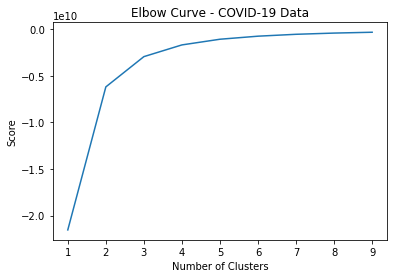

In [49]:
# Plot the elbow curve 

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve - COVID-19 Data')
pl.show()

Optimal number of clusters is three.

### 3. k-means Clustering

In [50]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [51]:
# Fit the k-means object to the data
kmeans.fit(df_3)

/Users/caitlin/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [52]:
df_3['clusters'] = kmeans.fit_predict(df_3)

/Users/caitlin/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/var/folders/5y/s1_zpnxx04z7kvvp3b6fff9w0000gn/T/ipykernel_30566/1413470433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['clusters'] = kmeans.fit_predict(df_3)


In [53]:
df_3.head()

,order_code_home,order_code_mask,cases_per_100K,clusters
4,1,2,19.689,0
5,1,2,21.479,0
14,1,2,21.479,0
15,1,2,19.689,0
16,1,2,17.899,0


In [54]:
df_3['clusters'].value_counts()

0    370862
1    136053
2     52947
Name: clusters, dtype: int64

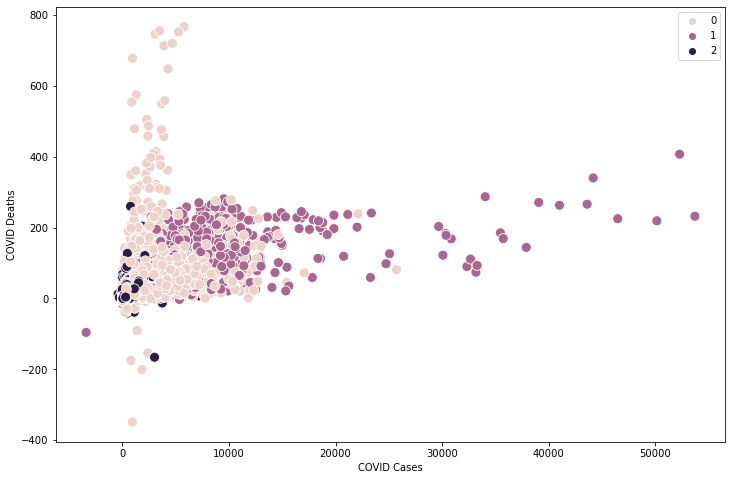

In [44]:
# Plot clusters for new COVID cases and new COVID deaths

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_3['New Cases'], y=df_3['New Deaths'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('COVID Cases')
plt.ylabel('COVID Deaths') 
plt.show()

This is not necessarily the best model for my dataset, but for the purposes of this activity, the plot clearly shows that as the number of new COVID cases go up, so do new deaths.

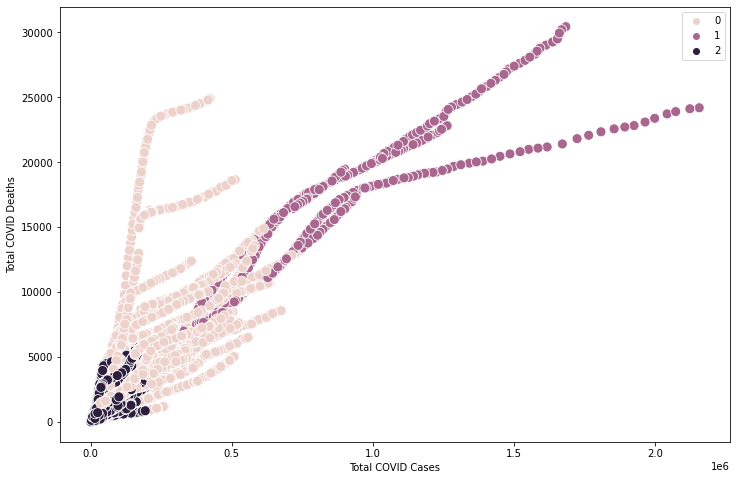

In [47]:
# Plot clusters for new COVID cases and new COVID deaths

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_3['Total Cases'], y=df_3['Total Deaths'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Total COVID Cases')
plt.ylabel('Total COVID Deaths') 
plt.show()

The total number of COVID cases also represents a total number of COVID deaths. It is a very interesting shape, however.

In [48]:
df_3.loc[df_3['clusters'] == 2, 'cluster'] = 'dark purple'
df_3.loc[df_3['clusters'] == 1, 'cluster'] = 'purple'
df_3.loc[df_3['clusters'] == 0, 'cluster'] = 'pink'

In [49]:
df_3.groupby('cluster').agg({'New Cases':['mean', 'median'], 
                         'New Deaths':['mean', 'median'], 
                         'Total Cases':['mean', 'median'],
                          'Total Deaths':['mean', 'median']})

New Cases         New Deaths           Total Cases            \
                    mean  median       mean median           mean    median   
cluster                                                                       
dark purple   442.617383   189.0   7.240228    3.0   33969.924739   15834.0   
pink         1857.708002  1131.0  34.586398   20.0  171663.695620  153620.0   
purple       6364.937500  4498.5  98.589461   79.0  578304.454657  602715.5   

             Total Deaths           
                     mean   median  
cluster                             
dark purple    813.760986    399.0  
pink          5653.047865   4081.0  
purple       11557.278186  12957.5

Again, this is not the best model for this dataset. It makes sense, however, and very clearly illustrates that as the number of COVID cases grows, the number of deaths follows. In the first cluster, for a median of 63 new cases of COVID to one death. In the next cluster, for a median of 57 cases, there is one death. Finally, the last cluster, for a median of 56 cases, there is one death. This suggests that as the number of cases grow, the likelihood of dying gets higher. Based on news reports at this time during the COVID pandemic in the US, it makes sense. As there are more cases, hospitals get more full and liklihood of dying is a bit higher. But not significantly. 